<a href="https://colab.research.google.com/github/heyggun/bigdata_analysis_test/blob/main/DataManim_type2_Classification_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작업형 2유형

## 분류 Classification

### 정시 배송 여부 판단 (2회기출)

- 데이터 설명 : e-commerce 배송의 정시 도착여부 (1: 정시배송 0 : 정시미배송)

- x_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_train.csv
- y_train: https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_train.csv
- x_test: https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_test.csv
- x_label(평가용) : https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_test.csv

- 데이터 출처 :https://www.kaggle.com/datasets/prachi13/customer-analytics (참고, 데이터 수정)

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [6]:
x_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_train.csv')
x_test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/X_test.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/shipping/y_test.csv')

In [8]:
display(x_train.head(3))
print(x_train.shape)

display(y_train.head(3))
print(y_train.shape)

display(x_test.head(3))
print(x_test.shape)

display(x_test.head(3))
print(x_test.shape)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,6045,A,Flight,4,3,266,5,high,F,5,1590
1,44,F,Ship,3,1,174,2,low,M,44,1556
2,7940,F,Road,4,1,154,10,high,M,10,5674


(6598, 11)


,ID,Reached.on.Time_Y.N
0,6045,0
1,44,1
2,7940,1


(6598, 2)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,6811,D,Ship,5,2,259,5,low,F,7,1032
1,4320,F,Ship,3,5,133,3,medium,F,4,5902
2,5732,F,Road,3,4,191,5,medium,F,4,4243


(4401, 11)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,6811,D,Ship,5,2,259,5,low,F,7,1032
1,4320,F,Ship,3,5,133,3,medium,F,4,5902
2,5732,F,Road,3,4,191,5,medium,F,4,4243


(4401, 11)


In [10]:
obj = x_train.select_dtypes(include='object').columns
num = x_train.select_dtypes(include='number').columns

display(x_train[obj].head(3))
display(x_test[num].head(3))

print(obj)
print(num)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance,Gender
0,A,Flight,4,high,F
1,F,Ship,3,low,M
2,F,Road,4,high,M


,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,6811,2,259,5,7,1032
1,4320,5,133,3,4,5902
2,5732,4,191,5,4,4243


Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Product_importance', 'Gender'],
      dtype='object')
Index(['ID', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [12]:
x_train['Customer_care_calls'].value_counts()

4     2115
3     1919
5     1403
6      604
2      404
$7     153
Name: Customer_care_calls, dtype: int64

In [14]:
x_train['Coustomer_care_calls'] = x_train['Customer_care_calls'].apply(lambda x: int(x.replace('$','')))

4    2115
3    1919
5    1403
6     604
2     404
7     153
Name: Customer_care_calls, dtype: int64

In [15]:
obj = x_train.select_dtypes(include='object').columns
num = x_train.select_dtypes(include='number').columns

display(x_train[obj].head(3))
display(x_test[num].head(3))

print(obj)
print(num)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance,Gender
0,A,Flight,4,high,F
1,F,Ship,3,low,M
2,F,Road,4,high,M


,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,6811,2,259,5,7,1032
1,4320,5,133,3,4,5902
2,5732,4,191,5,4,4243


Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Product_importance', 'Gender'],
      dtype='object')
Index(['ID', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms'],
      dtype='object')


In [22]:

def do_encoder(df):

  obj = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Product_importance', 'Gender']

  for col in obj:
    Encoder = OneHotEncoder()
    df[col] = Encoder.fit_transform(df[col].values.reshape(-1,1))

  return df

In [29]:
x_train_e = pd.get_dummies(x_train)
display(x_train_e.head(3))

x_test_e = pd.get_dummies(x_test)
display(x_test_e.head(3))

,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,...,Customer_care_calls_2,Customer_care_calls_3,Customer_care_calls_4,Customer_care_calls_5,Customer_care_calls_6,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,6045,3,266,5,5,1590,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,44,1,174,2,44,1556,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,7940,1,154,10,10,5674,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,...,Customer_care_calls_2,Customer_care_calls_3,Customer_care_calls_4,Customer_care_calls_5,Customer_care_calls_6,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,6811,2,259,5,7,1032,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,4320,5,133,3,4,5902,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,5732,4,191,5,4,4243,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [30]:
def do_scaler(df):

  num = ['Customer_rating', 'Cost_of_the_Product', 'Prior_purchases','Discount_offered', 'Weight_in_gms']

  for col in num:
    Scaler = StandardScaler()
    df[col] = Scaler.fit_transform(df[col].values.reshape(-1,1))

  return df

In [32]:
x_train_s = do_scaler(x_train_e)
display(x_train_s.head(3))

x_test_s = do_scaler(x_test_e)
display(x_test_s.head(3))

,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,...,Customer_care_calls_2,Customer_care_calls_3,Customer_care_calls_4,Customer_care_calls_5,Customer_care_calls_6,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,6045,0.006129,1.152368,0.941089,-0.516099,-1.231489,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,44,-1.412796,-0.754193,-1.043983,1.893385,-1.252277,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,7940,-1.412796,-1.168663,4.249543,-0.207190,1.265494,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


,ID,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,...,Customer_care_calls_2,Customer_care_calls_3,Customer_care_calls_4,Customer_care_calls_5,Customer_care_calls_6,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,6811,-0.696928,1.027827,0.940162,-0.394425,-1.619908,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,4320,1.416425,-1.609909,-0.358740,-0.579236,1.360732,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,5732,0.711974,-0.395713,0.940162,-0.579236,0.345356,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [37]:

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(x_train_s.drop(columns=['ID']), y_train['Reached.on.Time_Y.N'], test_size=0.3,
                                                            random_state=1234)

print(X_train_m.shape)
print(X_test_m.shape)
print(y_train_m.shape)
print(y_test_m.shape)

(4618, 24)
(1980, 24)
(4618,)
(1980,)


In [39]:
X_train_m.head(3)

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,...,Customer_care_calls_2,Customer_care_calls_3,Customer_care_calls_4,Customer_care_calls_5,Customer_care_calls_6,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
4890,-1.412796,0.468493,1.602780,-0.701443,1.101637,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1113,-0.703334,-1.044322,0.279398,-0.268972,0.921884,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4390,-0.703334,0.572110,-0.382292,-0.639662,1.015429,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [38]:
model = RandomForestClassifier()
model.fit(X_train_m, y_train_m)
prediction = model.predict_proba(X_test_m)[:,1]

print(roc_auc_score(y_test_m, prediction))

0.7490494636597387


In [43]:
model.fit(x_train_s.drop(columns=['ID']), y_train['Reached.on.Time_Y.N'])
pred = model.predict_proba(x_test_s.drop(columns=['ID']))[:,1]

print(roc_auc_score(y_test['Reached.on.Time_Y.N'], pred))


0.730002145393304


In [52]:
from sklearn.metrics import f1_score

pred_class = model.predict(x_test_s.drop(columns=['ID']))
print(pred_class)
print(y_test["Reached.on.Time_Y.N"].values)

print(f1_score(y_test['Reached.on.Time_Y.N'],pred_class, pos_label=1))

[1 0 0 ... 0 0 1]
[0 0 1 ... 1 1 1]
0.6904617866505344


1. object datatype 이던 'Customer_care_calls' 컬럼 attiribute 중 다른 형식이 있어서 불필요한 문자열 제거 후 numeric한 컬럼으로 변경
2. 범주형 변수는 OneHotEncoding 함
3. 수치형 변수는 StandardScaler 진행함
4. 기본 RandomForestClassifier 으로 분류 진행
5. roc_auc_score 0.73 나옴 (f1 score는 0.69)

**` XGBOOST 사용 `** 



In [61]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [63]:
xgb = XGBClassifier(n_estimators= 400, learning_rate=0.1, max_depth=3)
xgb.fit(X_train_m, y_train_m)
xgb_prediction = xgb.predict_proba(X_test_m)[:,1]

print(xgb_prediction)


print(roc_auc_score(y_test_m, xgb_prediction))

[0.41535074 0.5591422  0.32005984 ... 0.3888091  0.41899297 0.8551623 ]
0.7411921524729727


In [64]:
xgb.fit(x_train_s.drop(columns=['ID']), y_train['Reached.on.Time_Y.N'])
xgb_pred = xgb.predict_proba(x_test_s.drop(columns=['ID']))[:,1]

print(roc_auc_score(y_test['Reached.on.Time_Y.N'], pred))

0.730002145393304


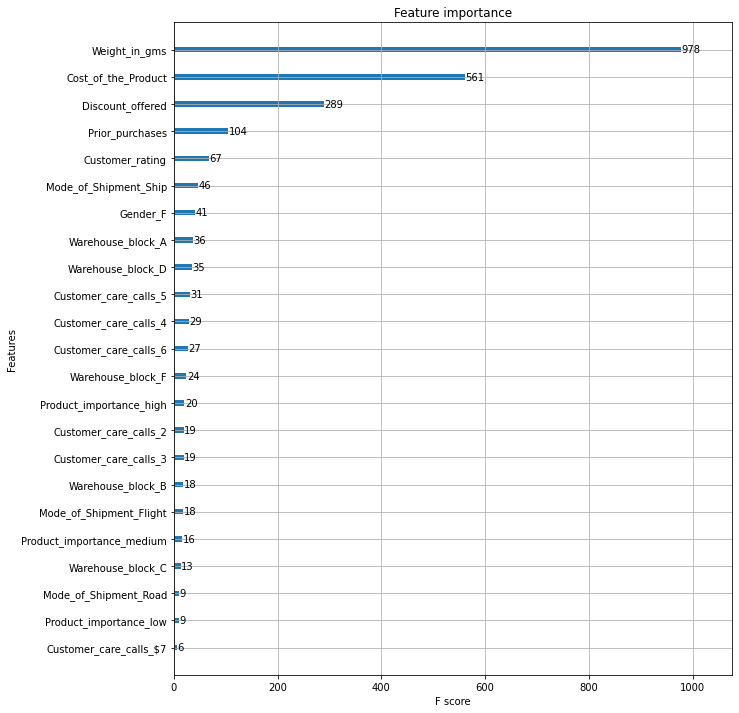

In [66]:
from xgboost import plot_importance

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb, ax=ax)

1. 그냥 위에 베이스 랜덤포레스트와 성능 같음...

**`Voting Classifier 시도`** 

In [70]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [71]:
LGBM = LGBMClassifier()
XGB = XGBClassifier()
RF = RandomForestClassifier()

In [72]:
VC = VotingClassifier(estimators=[('rf',RF), ('xgb',XGB), ('lgbm',LGBM)], voting='soft')

In [73]:
VC.fit(X_train_m, y_train_m)
VC_prediction = VC.predict_proba(X_test_m)[:,1]

In [74]:
print(roc_auc_score(y_test_m, VC_prediction))

0.7475592204655156


In [76]:
VC.fit(x_train_s.drop(columns=['ID']), y_train['Reached.on.Time_Y.N'])
VC_pred = VC.predict_proba(x_test_s.drop(columns=['ID']))[:,1]

print(roc_auc_score(y_test['Reached.on.Time_Y.N'], VC_pred))


0.7343820730935497


In [77]:
VC_class = VC.predict(x_test_s.drop(columns=['ID']))
print(VC_class)
print(y_test["Reached.on.Time_Y.N"].values)

print(f1_score(y_test['Reached.on.Time_Y.N'],VC_class, pos_label=1))

[1 0 0 ... 0 0 1]
[0 0 1 ... 1 1 1]
0.6878101402373246


1. Voting classifier 해도 r2_score 같음.. 왜?